<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Estatística
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Média e Variância;</li>
  <li>Ordem e Posição;</li>
  <li>Correlação.</li>
</ol>

---

# **Exercícios**

## 1\. Tráfego de São Paulo

Neste exercício, vamos continuar a analisar os dados de mobilidade urbana da cidade de São Paulo. A base de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv) e é uma copia do dado original, presente neste [link](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil). A base de dados contem a quantidade de acidentes ocorridos na cidade entre 14/12/09 e 18/12/09, das 07:00h ás 20:00h, agregados em intervalos de 30 minutos.

In [1]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv" -O traffic.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('traffic.csv', sep=';')

In [4]:
df.head()

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


- **Exemplo**: (para relembrar)

O código abaixo extrai a 13ª linha do arquivo que representa a 14ª meia hora do dia 14/12/09, contadas a partir das 07:00h, ou seja, todos os incidentes ocorridos na cidade no dia em questão entre as 13:30h e 14:00h. Vemos, por exemplo, que dois ônibus e dois caminhões ficaram paradados nas ruas da cidade, atrapalhando o tráfego.

In [5]:
df.iloc[[13]]

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
13,14,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"4,9"


### **1.1. Agregação** 

Neste primeira atividade, você deve gerar um array NumPy por dia. Para cada array você deve somar todos os incidentes que aconteceram naquela meia hora. Sendo assim, cada array deve ter 27 posições, cada qual com a soma dos incidentes daquela meira hora.

**Dica**: Você deve remover a primeira e a última coluna.

**Dica**: Os arrays devem ter os seguintes valores:

```python
14: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]
15: [3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]
16: [1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]
17: [4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]
18: [10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0]
```

In [6]:
# Removendo a primeira e a última coluna
dados_filtrados = df.iloc[:,1:-1]
dados_filtrados.head(5)

,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Soma dos incidentes por meia hora
soma_incidentes_dia_14 = dados_filtrados.iloc[0:27].sum(axis=1)
soma_incidentes_dia_14

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    5
14    2
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    2
25    2
26    3
dtype: int64

In [8]:
import numpy as np 
# Convertendo para Array Numpy
array_incidentes_dia_14 = soma_incidentes_dia_14.to_numpy()
print(array_incidentes_dia_14)
np.sum(array_incidentes_dia_14)

[0 0 0 0 0 0 0 0 0 0 0 1 0 5 2 0 0 0 0 0 1 0 0 0 2 2 3]


16

In [9]:
# Dia 15
# Soma dos incidentes por meia hora
soma_incidentes_dia_15 = dados_filtrados.iloc[27:54].sum(axis=1)
soma_incidentes_dia_15
# Convertendo para Array Numpy
array_incidentes_dia_15 = soma_incidentes_dia_15.to_numpy()
print(array_incidentes_dia_15)
np.sum(array_incidentes_dia_15)


[3 0 0 0 2 4 2 1 3 0 2 0 2 3 2 2 4 7 6 3 0 1 1 5 4 6 0]


63

In [10]:
# Dia 16
# Soma dos incidentes por meia hora
soma_incidentes_dia_16 = dados_filtrados.iloc[54:81].sum(axis=1)
soma_incidentes_dia_16
# Convertendo para Array Numpy
array_incidentes_dia_16 = soma_incidentes_dia_16.to_numpy()
print(array_incidentes_dia_16)
np.sum(array_incidentes_dia_16)

[ 1  1  2  4  4  5  3  2  4  2  1  1  3  6  2  0  2  8  4  6  4  1  2  7
 15  4  0]


94

In [11]:
# Dia 17
# Soma dos incidentes por meia hora
soma_incidentes_dia_17 = dados_filtrados.iloc[81:108].sum(axis=1)
soma_incidentes_dia_17
# Convertendo para Array Numpy
array_incidentes_dia_17 = soma_incidentes_dia_17.to_numpy()
print(array_incidentes_dia_17)
np.sum(array_incidentes_dia_17)

[ 4  1  1  0  0  0  2  3  2  7  2  1  7  3  6  4  3  2  2  3  2  5  2  0
  1  4 15]


82

In [12]:
# Dia 18
# Soma dos incidentes por meia hora
soma_incidentes_dia_18 = dados_filtrados.iloc[108:135].sum(axis=1)
soma_incidentes_dia_18
# Convertendo para Array Numpy
array_incidentes_dia_18 = soma_incidentes_dia_18.to_numpy()
print(array_incidentes_dia_18)
np.sum(array_incidentes_dia_18)

[10  1  1  5  5  7  3  4  3  1  2  3  2  2  6  2  2  4  2  3  0  3  3  2
  3  6  0]


85

In [13]:
# Dia Inicial
dia_inicial = 14

# Número de dias
num_dias = 5

# Tamanho padrão para cada dia
tamanho_padrao_dia = 27

# Dicionário para armazenar os resultados
resultado_dias = {}

# Loop for para os dias
for dia in range(14, 14 + num_dias): # Começando do dia 14
    # índices de corte para o dia atual
    inicio = (dia - dia_inicial) * tamanho_padrao_dia
    fim = (dia - dia_inicial + 1) * tamanho_padrao_dia

    # Soma dos incidentes por meia hora para o dia atual
    soma_indicentes_meia_hora = dados_filtrados.iloc[inicio:fim].sum(axis=1).to_numpy()
    # Somando todos os incidentes do dia
    soma_incidentes_dia = soma_indicentes_meia_hora.sum()

    # Armazenando o resultado no dicionário 
    resultado_dias[dia] = [soma_indicentes_meia_hora, soma_incidentes_dia]

# Exibindo o total de incidentes a cada meia hora por dia
for dia, total_incidentes in resultado_dias.items():
    print(f"Dia {dia} - Incidentes a cada meia hora: {total_incidentes[0]}")

# Exibindo o total de incidentes diários 
for dia, total_incidentes in resultado_dias.items():
    print(f"Dia {dia} - Total de Incidentes: {total_incidentes[1]}")

Dia 14 - Incidentes a cada meia hora: [0 0 0 0 0 0 0 0 0 0 0 1 0 5 2 0 0 0 0 0 1 0 0 0 2 2 3]
Dia 15 - Incidentes a cada meia hora: [3 0 0 0 2 4 2 1 3 0 2 0 2 3 2 2 4 7 6 3 0 1 1 5 4 6 0]
Dia 16 - Incidentes a cada meia hora: [ 1  1  2  4  4  5  3  2  4  2  1  1  3  6  2  0  2  8  4  6  4  1  2  7
 15  4  0]
Dia 17 - Incidentes a cada meia hora: [ 4  1  1  0  0  0  2  3  2  7  2  1  7  3  6  4  3  2  2  3  2  5  2  0
  1  4 15]
Dia 18 - Incidentes a cada meia hora: [10  1  1  5  5  7  3  4  3  1  2  3  2  2  6  2  2  4  2  3  0  3  3  2
  3  6  0]
Dia 14 - Total de Incidentes: 16
Dia 15 - Total de Incidentes: 63
Dia 16 - Total de Incidentes: 94
Dia 17 - Total de Incidentes: 82
Dia 18 - Total de Incidentes: 85


In [14]:
# Número de dias
num_dias = 4

# Tamanho padrão para cada dia
tamanho_padrao_dia = 27

# Dicionário para armazenar os resultados
resultado_dias = {}

# Loop for para os dias
for dia in range(15, 15 + num_dias):  # Começando do dia 15
    # Índices de corte para o dia atual
    inicio = (dia - 15) * tamanho_padrao_dia + 28
    fim = (dia - 15 + 1) * tamanho_padrao_dia + 28
    
    # Soma dos incidentes por meia hora para o dia atual
    soma_incidentes_dia = dados_filtrados.iloc[inicio:fim].sum().sum()  # Somando todos os valores do DataFrame
    
    # Armazenando o resultado no dicionário
    resultado_dias[dia] = soma_incidentes_dia

# Exibindo o resultado com nova linha após cada par chave-valor
for dia, total_incidentes in resultado_dias.items():
    print(f"Dia {dia} - Total de Incidentes: {total_incidentes}")

Dia 15 - Total de Incidentes: 61
Dia 16 - Total de Incidentes: 97
Dia 17 - Total de Incidentes: 88
Dia 18 - Total de Incidentes: 75


### **1.2. Métricas** 

Para cada array você deve calcular as seguintes métricas: 

 - **média**;
 - **desvio padrão**.

In [15]:
import numpy as np

# Arrays de incidentes de cada dia
arrays_incidentes = {
    "Dia 14": np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]),
    "Dia 15": np.array([3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]),
    "Dia 16": np.array([1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]),
    "Dia 17": np.array([4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]),
    "Dia 18": np.array([10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0])
}

# Loop sobre cada dia para calcular média e desvio padrão
for dia, incidentes in arrays_incidentes.items():
    media = np.mean(incidentes)
    desvio_padrao = np.std(incidentes)
    print(f"{dia} - Média: {media}, Desvio Padrão: {desvio_padrao}")

Dia 14 - Média: 0.5925925925925926, Desvio Padrão: 1.1944085553034889
Dia 15 - Média: 2.3333333333333335, Desvio Padrão: 2.0184335693983275
Dia 16 - Média: 3.4814814814814814, Desvio Padrão: 3.047407767514698
Dia 17 - Média: 3.037037037037037, Desvio Padrão: 3.0487578707046925
Dia 18 - Média: 3.1481481481481484, Desvio Padrão: 2.1892617342417258


In [16]:
# Calculando a média dos incidentes
media_dia_17 = np.mean(array_incidentes_dia_17)

# Calculando o total de incidentes
total_incidentes = np.sum(array_incidentes_dia_17)

# Calculando a porcentagem
porcentagem = (media_dia_17 / total_incidentes) * 100

# Exibindo os resultados
print("A média de incidentes por dia é:", media_dia_17)
print("O total de incidentes é:", total_incidentes)
print("A porcentagem em relação ao total de incidentes é:", porcentagem)

A média de incidentes por dia é: 3.037037037037037
O total de incidentes é: 82
A porcentagem em relação ao total de incidentes é: 3.703703703703704


### **1.3. Interpretação** 

Baseado nos resultados da questão 1.2, responda:

> Qual dia apresenta a maior média de acidentes por meia hora?

> Qual dia apresenta a menor variação de acidentes por meia hora?

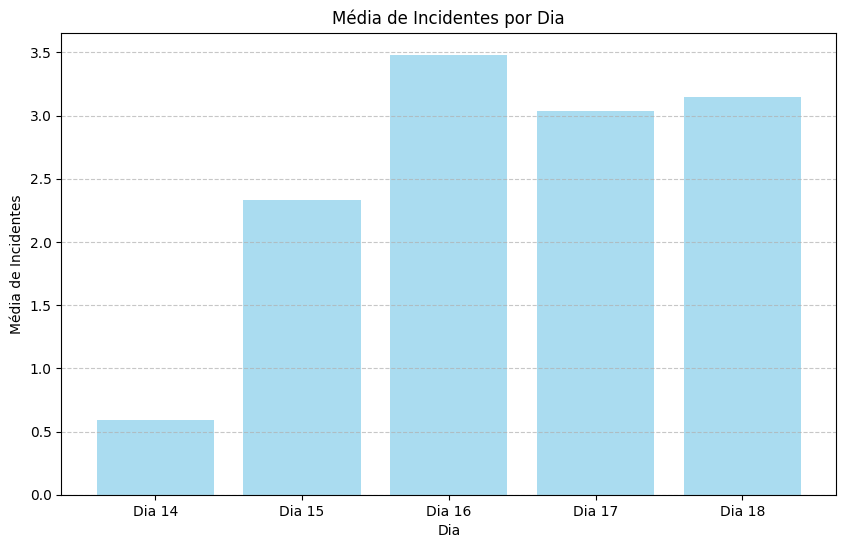

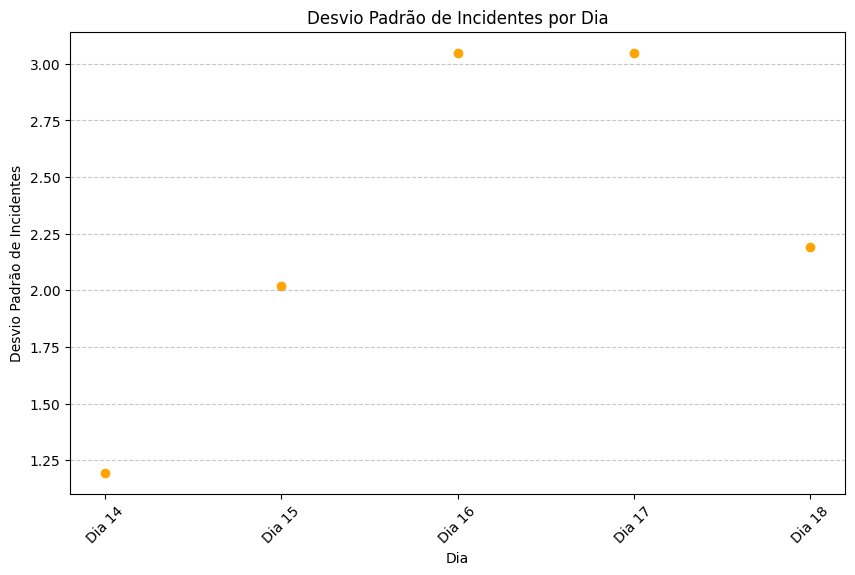

In [17]:
import matplotlib.pyplot as plt

# Arrays de incidentes de cada dia
arrays_incidentes = {
    "Dia 14": np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]),
    "Dia 15": np.array([3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]),
    "Dia 16": np.array([1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]),
    "Dia 17": np.array([4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]),
    "Dia 18": np.array([10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0])
}

# Listas para armazenar médias e desvios padrão
medias = []
desvios_padrao = []

# Loop sobre cada dia para calcular média e desvio padrão
for dia, incidentes in arrays_incidentes.items():
    media = np.mean(incidentes)
    desvio_padrao = np.std(incidentes)
    medias.append(media)
    desvios_padrao.append(desvio_padrao)

# Dias e seus índices para o eixo x
dias = list(arrays_incidentes.keys())
indices = np.arange(len(dias))

# Plotando gráfico de barras para as médias
plt.figure(figsize=(10, 6))
plt.bar(indices, medias, color='skyblue', alpha=0.7)
plt.xlabel('Dia')
plt.ylabel('Média de Incidentes')
plt.title('Média de Incidentes por Dia')
plt.xticks(indices, dias)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotando gráfico de dispersão para os desvios padrão
plt.figure(figsize=(10, 6))
plt.scatter(dias, desvios_padrao, color='orange')
plt.xlabel('Dia')
plt.ylabel('Desvio Padrão de Incidentes')
plt.title('Desvio Padrão de Incidentes por Dia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

---

**Respostas:** 

- Com relação a primeira pergunta, a maior média de acidentes que aconteceu foi no dia 16, com uma média de 3.4 acidentes por dia.

- No gráfico acima de dispersão, os dados estão dispersos e a menor variação de acidentes comparada com as demais foi no dia 14, com 1.19 o desvio padrão comparado com a média dos demais dias.